In [31]:
from IPython.display import Image
Image(url='https://repository-images.githubusercontent.com/286819592/b82e14cf-3c85-4f91-84c0-bea095c353a8', width=400)

In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import pandas as pd

In [28]:
#importing spread sheet
df = pd.read_csv('CarPrice_pred.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [5]:
df['CarName'].nunique()

147

In [6]:
df.duplicated().sum()

0

In [8]:
df.duplicated().sum()

0

In [7]:
df['cylindernumber']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

In [8]:
#factors that are Affecting car price
df.iloc[:,10:25]

,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [9]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [10]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [11]:
df=df.drop(['CarName','symboling','doornumber','enginelocation','wheelbase','car_ID'],axis=1)

In [12]:
df

,fueltype,aspiration,carbody,drivewheel,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,hatchback,rwd,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,sedan,fwd,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,sedan,4wd,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,sedan,rwd,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,sedan,rwd,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,sedan,rwd,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
df_d = pd.get_dummies(df,drop_first = False)
df_d

,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,0
3,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,...,0,0,0,0,0,0,0,1,0,0
201,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,...,0,0,0,0,0,0,0,1,0,0
202,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,...,0,0,0,0,0,0,0,1,0,0
203,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,...,0,0,0,0,0,1,0,0,0,0


In [15]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carlength              205 non-null    float64
 1   carwidth               205 non-null    float64
 2   carheight              205 non-null    float64
 3   curbweight             205 non-null    int64  
 4   enginesize             205 non-null    int64  
 5   boreratio              205 non-null    float64
 6   stroke                 205 non-null    float64
 7   compressionratio       205 non-null    float64
 8   horsepower             205 non-null    int64  
 9   peakrpm                205 non-null    int64  
 10  citympg                205 non-null    int64  
 11  highwaympg             205 non-null    int64  
 12  price                  205 non-null    float64
 13  fueltype_diesel        205 non-null    uint8  
 14  fueltype_gas           205 non-null    uint8  
 15  aspira

In [16]:
df_d.drop(['price'],axis =1)

,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,0
3,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,...,0,0,0,0,0,0,0,1,0,0
201,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,...,0,0,0,0,0,0,0,1,0,0
202,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,...,0,0,0,0,0,0,0,1,0,0
203,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,...,0,0,0,0,0,1,0,0,0,0


<Axes: >

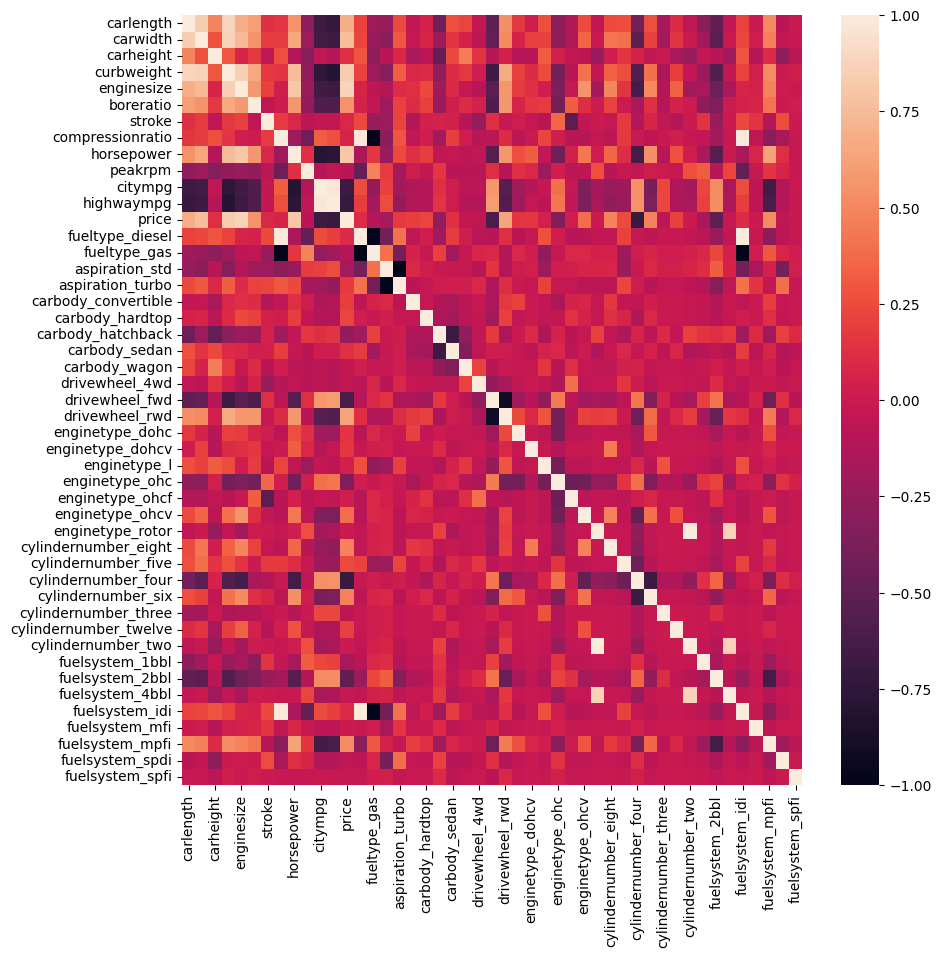

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(df_d.corr())

In [19]:
y = df['price']
x = df_d

In [22]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
#Train and test data split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
test_size=0.3,random_state=3)

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
print(y_pred)

[11595.  7975.  5572.  9298.  7738. 31600.  8948.  7898.  6692. 34184.
  6189.  7463.  6692. 14399. 32250.  9995.  6938.  9095.  9258.  7126.
 21485. 13499.  7129. 13950. 10595. 16630. 24565. 11048. 20970. 13499.
  6095. 17710. 22018. 40960. 15645.  7775. 10295. 35056. 17450.  9295.
  7609. 15510. 15040. 12945.  8358.  7788. 30760. 11245. 11850.  9495.
 10698.  7957.  5499.  6855. 19699. 12170. 14869. 11248.  9549. 36880.
  6479. 25552.]


In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))
# An R2 of 1.0 indicates that the data perfectly fit the linear model.

MAE: 6.351793643027063e-12
MSE: 8.830820120142727e-23
R2 score: 1.0
